In [126]:
#reading file and storing data into dataframe
import pandas as pd
companyData = pd.read_csv('Company_Data.csv')
companyData

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [127]:
#mapping non numeric data into numeric 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
companyData['ShelveLoc']= label_encoder.fit_transform(companyData['ShelveLoc']) 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
companyData['Urban']= label_encoder.fit_transform(companyData['Urban']) 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
companyData['US']= label_encoder.fit_transform(companyData['US']) 

In [129]:
companyData

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [130]:
#Splitting data into inputs and label
X=companyData[["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]]
Y=companyData[["Sales"]]

In [131]:
# Sales is continuous data, has to be converted into categorical data
Y["Sales"]=pd.cut(Y.Sales,bins=[0,5,10,15,20],labels=["low","lower_mid","mid","higher"])
Y["Sales"] = Y["Sales"].fillna("low")

<ipython-input-131-e0014a125de8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Sales"]=pd.cut(Y.Sales,bins=[0,5,10,15,20],labels=["low","lower_mid","mid","higher"])
<ipython-input-131-e0014a125de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Sales"] = Y["Sales"].fillna("low")


In [132]:
#Checking null values in Y
Y.isnull().sum()

Sales    0
dtype: int64

In [133]:
#Checking null values in X
X.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [134]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [145]:
#Building decision tree model using gini coefficient method
from sklearn.tree import DecisionTreeRegressor
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

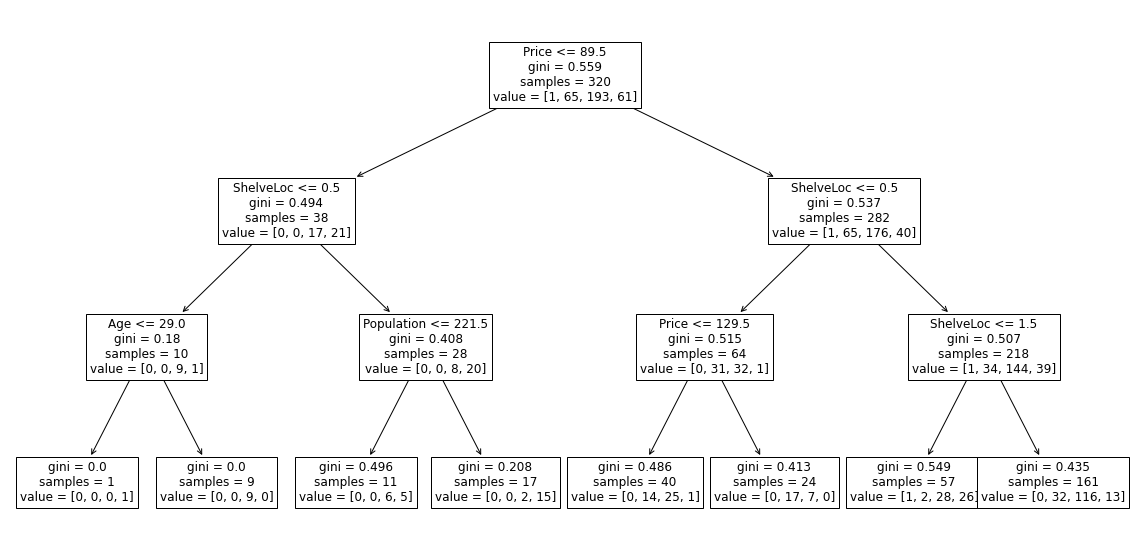

In [152]:
#Plotting tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, fontsize=12, feature_names=("CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"));

In [147]:
model_gini.score(x_test,y_test)

0.675

In [151]:
#Building decision tree model using entropy method
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

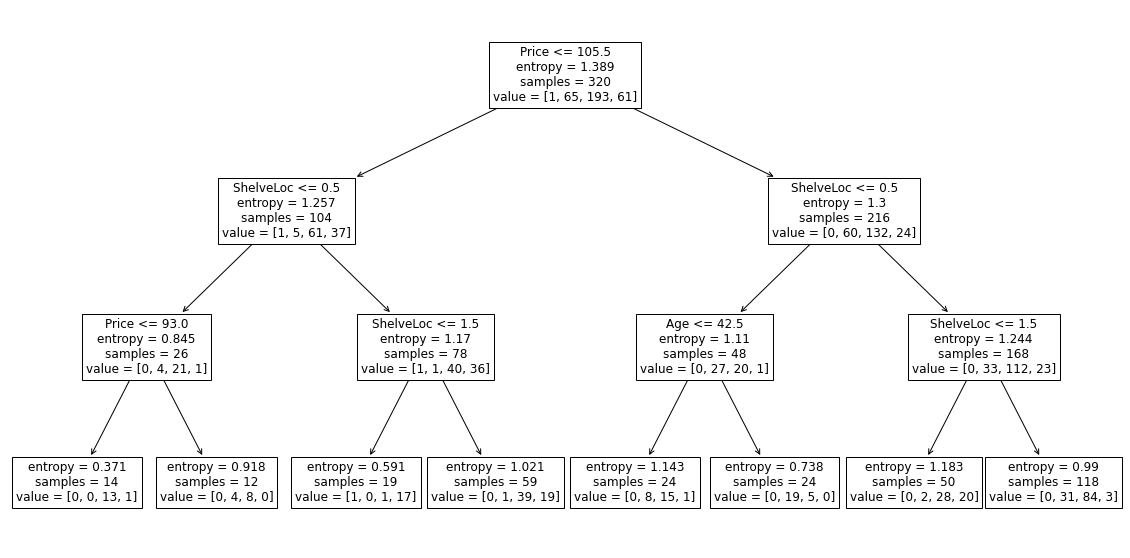

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model, fontsize=12, feature_names=("CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"));

In [150]:
model.score(x_test,y_test)

0.675